In [ ]:
!pip install --upgrade fairbench

In [1]:
import fairbench as fb

In [2]:
sensitive = fb.Fork(man=[1, 0, 1, 0, 0], woman=[0, 1, 0, 1, 0], nonbin=[0, 0, 0, 0, 1])

In [3]:
sensitive

man,"[1, 0, 1, 0, 0]"
woman,"[0, 1, 0, 1, 0]"
nonbin,"[0, 0, 0, 0, 1]"


In [4]:
sensitive.man

[1, 0, 1, 0, 0]

In [5]:
sensitive[1]

woman,1
nonbin,0
man,0


In [6]:
sensitive.sum()  # apply sum to all forks

ComputationWithExplainableError: 

c:\users\manio\pycharmprojects\fairbench\fairbench\core\explanation\error.py:157: UserWarning: ExplainableError: Cannot call call with arguments ([1, 0, 1, 0, 0], '__getattribute__', 'sum') {}
This error only appears because you requested dependent computations.
Otherwise, it is normal for reports or other FairBench data to hold ExplainableError.
You need to check your data first for any errors (you will see --- when printing them).
- Issue tracker https://github.com/mever-team/FairBench/issues
- Full trace in ./fairbench.log
  warnings.warn(self.format_traceback(False))


In [7]:
counts = fb.tobackend(sensitive).sum()
counts

man,2
woman,2
nonbin,1


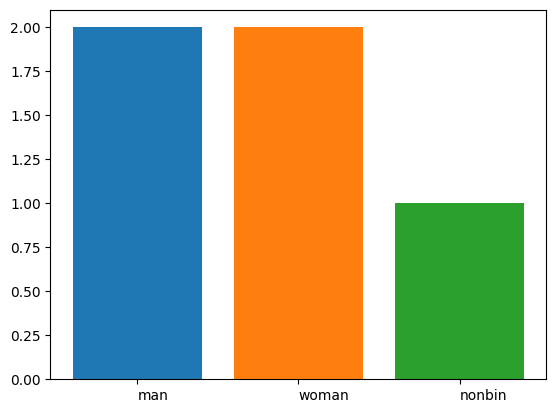

In [8]:
fb.visualize(counts)

In [9]:
sensitive = fb.Fork(fb.categories@["Man", "Woman", "Man", "Woman", "Nonbin"])
sensitive

Nonbin,[0 0 0 0 1]
Woman,[0 1 0 1 0]
Man,[1 0 1 0 0]


In [10]:
sensitive = fb.Fork(fb.categories@["Man", "Woman", "Man", "Woman", "Nonbin"], 
                    fb.categories@["White", "White", "White", "Black", "Black"])
sensitive

Nonbin,[0 0 0 0 1]
Woman,[0 1 0 1 0]
Man,[1 0 1 0 0]
White,[1 1 1 0 0]
Black,[0 0 0 1 1]


In [11]:
sensitive = sensitive.intersectional()
sensitive

Black,[0 0 0 1 1]
White,[1 1 1 0 0]
Man,[1 0 1 0 0]
Man&White,[1 0 1 0 0]
Woman,[0 1 0 1 0]
Woman&Black,[0 0 0 1 0]
Woman&White,[0 1 0 0 0]
Nonbin,[0 0 0 0 1]
Nonbin&Black,[0 0 0 0 1]


In [12]:
predictions = [1, 0, 1, 0, 0]
labels = [1, 1, 1, 0, 1]

In [13]:
fb.accuracy(predictions=predictions, labels=labels)

0.6

In [14]:
fb.accuracy(predictions=predictions, labels=labels, sensitive=sensitive)

Man&White,1.000
White,0.667
Nonbin,0.000
Nonbin&Black,0.000
Man,1.000
Woman&Black,1.000
Black,0.500
Woman&White,0.000
Woman,0.500
